In [5]:
from datetime import datetime, timedelta, date
import csv
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from fbprophet import Prophet

In [6]:
df = pd.read_csv('../Full_Monthly.csv',index_col=0)

In [7]:
df.head()

,Date,Ticker,Sector,Industry,Cash From Operations,Current Market Cap,EBITDA Margin,Free Cash Flow,Gross Margin,Interest Expense,...,Yield.10.Yr.Vol.63,Yield.20.Yr.Vol.21,Yield.20.Yr.Vol.63,Yield.30.Yr.Vol.21,Yield.30.Yr.Vol.63,Total,OAS,Shiller.PE.Ratio,VIX.Value,VIX.VXV
1,1998-07-01,BAX,"Consumer, Non-cyclical",Healthcare-Products,146.000,15118.3532,25.5814,17.000,46.0888,39.000,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,72.402903,38.26,24.799999,NaN
2,1998-07-01,VOD,Communications,Telecommunications,NaN,256921.1418,NaN,NaN,NaN,NaN,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,78.340585,38.26,24.799999,NaN
3,1998-07-01,PXD,Energy,Oil&Gas,91.369,2398.8883,45.2357,-56.929,23.5375,41.017,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,147.188061,38.26,24.799999,NaN
4,1998-07-01,KMI,Energy,Pipelines,453.000,36519.0472,27.3650,-10.000,34.1947,297.000,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,113.533557,38.26,24.799999,NaN
5,1998-07-01,AZN,"Consumer, Non-cyclical",Pharmaceuticals,311.000,82119.0000,28.0482,-203.000,69.4947,33.000,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,60.176544,38.26,24.799999,NaN


In [12]:
df.dtypes.head()

Date                    datetime64[ns]
Ticker                          object
Sector                          object
Industry                        object
Cash From Operations           float64
dtype: object

### 35,064 observations

In [9]:
len(df)

35064

In [10]:
df.describe()

,Cash From Operations,Current Market Cap,EBITDA Margin,Free Cash Flow,Gross Margin,Interest Expense,Long Term Debt,Net Debt,Net Income/Net Profit (Losses),Revenue,...,Yield.10.Yr.Vol.63,Yield.20.Yr.Vol.21,Yield.20.Yr.Vol.63,Yield.30.Yr.Vol.21,Yield.30.Yr.Vol.63,Total,OAS,Shiller.PE.Ratio,VIX.Value,VIX.VXV
count,34416.000000,34647.000000,34290.000000,34290.000000,32697.000000,34389.000000,3.465000e+04,34650.000000,34416.000000,3.465000e+04,...,35064.000000,35064.000000,35064.000000,29020.000000,29282.000000,35064.000000,34999.000000,35064.000000,35064.000000,29816.000000
mean,1280.759140,50383.998924,22.652417,652.872743,41.294735,124.105400,1.109283e+04,6095.889031,669.087025,9.499222e+03,...,0.165653,0.091606,0.154919,0.087695,0.148144,153.386671,138.259805,26.363448,19.832317,0.937338
std,6088.493883,66479.485752,15.929808,4815.461803,22.631193,315.221063,3.131732e+04,24090.633511,2022.226901,4.921038e+04,...,0.088155,0.055520,0.080396,0.061409,0.085300,65.231383,103.342547,6.091675,8.051695,0.196559
min,-220042.935500,398.809866,-285.937768,-300994.398610,-369.349226,-62.463218,-3.877647e+02,-200675.000000,-93846.225698,-6.145949e+01,...,0.048840,0.030150,0.061374,0.027001,0.034493,76.832150,-1503.125000,13.320000,9.510000,0.599930
25%,263.288751,13244.955420,12.957125,51.967321,24.965483,29.173929,2.289970e+03,839.190577,139.286215,2.187848e+03,...,0.103352,0.063520,0.103344,0.059825,0.095271,112.972668,84.694456,22.600000,13.840000,0.823625
50%,602.837257,25492.565064,20.772672,282.712999,39.885892,72.580527,5.577126e+03,3522.240696,329.052014,3.971007e+03,...,0.137183,0.080838,0.134954,0.075141,0.125602,136.313962,114.509722,25.690000,17.750000,0.900752
75%,1286.654551,59057.008908,31.180740,788.148975,58.133310,146.952248,1.136533e+04,9001.706545,765.715734,8.725784e+03,...,0.203721,0.101644,0.180300,0.096380,0.169973,173.348797,159.228902,27.550000,24.059999,1.017011
max,450738.000000,796064.939400,165.589996,377795.000000,159.437267,12089.706719,1.052778e+06,879685.091457,73979.088458,2.279306e+06,...,0.671005,0.585437,0.627464,0.644613,0.636794,546.125830,2459.297562,44.190000,59.889999,1.915768


### Range of values for OAS is from -1500 to 2500

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df_apc = df[df.Ticker == 'APC']
df_apc.head()

,Date,Ticker,Sector,Industry,Cash From Operations,Current Market Cap,EBITDA Margin,Free Cash Flow,Gross Margin,Interest Expense,...,Yield.10.Yr.Vol.63,Yield.20.Yr.Vol.21,Yield.20.Yr.Vol.63,Yield.30.Yr.Vol.21,Yield.30.Yr.Vol.63,Total,OAS,Shiller.PE.Ratio,VIX.Value,VIX.VXV
84,1998-07-01,APC,Energy,Oil&Gas,-25.136000,8188.947100,50.349000,-224.750000,36.713100,13.778000,...,0.100107,0.067771,0.117695,0.069570,0.126968,76.832150,2.985955,38.26,24.799999,NaN
165,1998-08-01,APC,Energy,Oil&Gas,-6.579638,6893.778004,49.684570,-199.386749,35.357716,14.171418,...,0.096231,0.055283,0.115589,0.055848,0.125602,83.081350,61.012423,35.42,44.279999,NaN
278,1998-09-01,APC,Energy,Oil&Gas,14.218799,5708.113050,48.835787,-178.006301,34.186541,14.570312,...,0.102958,0.085732,0.091965,0.108142,0.104934,117.118731,-6.442066,33.53,40.950001,NaN
422,1998-10-01,APC,Energy,Oil&Gas,39.501386,4741.456379,47.618295,-164.591463,33.383784,14.980159,...,0.313982,0.078516,0.187200,0.092554,0.218705,108.267015,177.859360,33.77,28.049999,NaN
487,1998-11-01,APC,Energy,Oil&Gas,68.991556,4084.201553,45.913709,-161.057837,33.009225,15.413649,...,0.374456,0.168363,0.194161,0.134962,0.247209,137.672554,212.383246,37.37,26.010000,NaN


In [26]:
df_apc = df_apc[['Date','OAS']]
df_apc['y'] = df_apc.OAS.pct_change().fillna(0)

In [56]:
df_apc.head()

,ds,OAS,y
0,1998-08-01,61.012423,19.433134
1,1998-09-01,-6.442066,-1.105586
2,1998-10-01,177.859360,-28.609057
3,1998-11-01,212.383246,0.194108
4,1998-12-01,55.330621,-0.739477


In [28]:
df_apc = df_apc.drop(df_apc.index[0])

In [43]:
#df_apc = df_apc.rename(index=str, columns={"y_orig": "y"})

In [55]:
df_apc = df_apc.drop('index',axis =1)

In [75]:
df_apc_train = df_apc[0:221]

In [77]:
df_apc_test = df_apc[221:]

In [78]:
df_apc_test.tail()

,ds,OAS,y
228,2017-08-01,197.633853,-0.048818
229,2017-09-01,220.736330,0.116895
230,2017-10-01,198.092829,-0.102582
231,2017-11-01,180.491567,-0.088854
232,2017-12-01,180.284127,-0.001149


In [105]:
model = Prophet(weekly_seasonality=False)
model.fit(df_apc)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/veronicahsieh/miniconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


### Building future time data

In [106]:
future_data = model.make_future_dataframe(periods = 3, freq = 'm')

In [107]:
forecast_data = model.predict(future_data)

In [108]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
231,2017-11-01,0.007997,-2.792529,2.835507
232,2017-12-01,0.034828,-2.630835,2.851832
233,2017-12-31,0.224731,-2.536461,3.213019
234,2018-01-31,0.211854,-2.713447,3.070079
235,2018-02-28,0.377189,-2.552861,3.071478


In [103]:
forecast_data['ds'] = forecast_data['ds'] + pd.DateOffset(1)

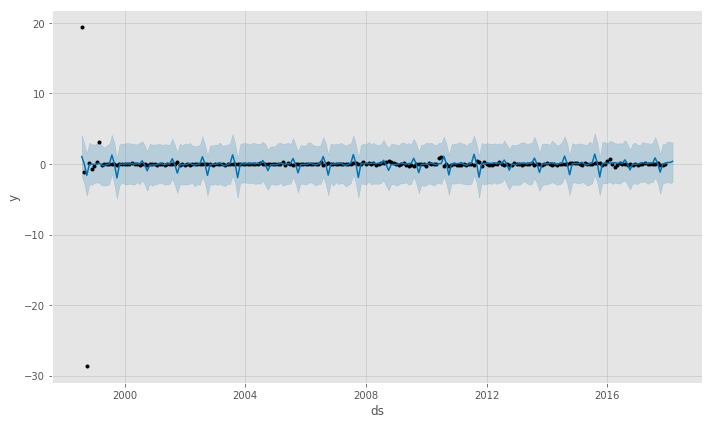

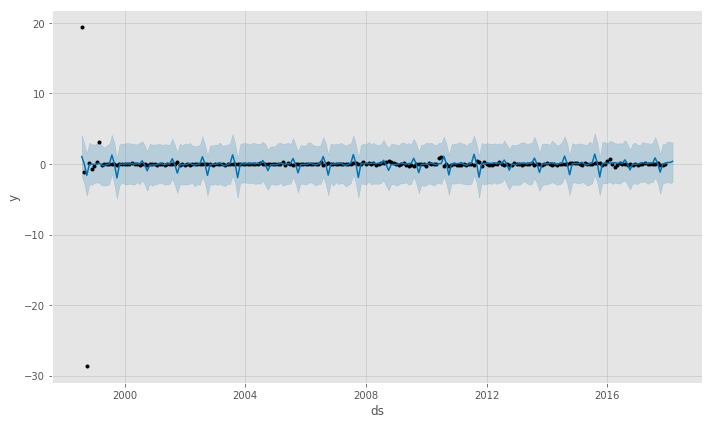

In [109]:
model.plot(forecast_data)

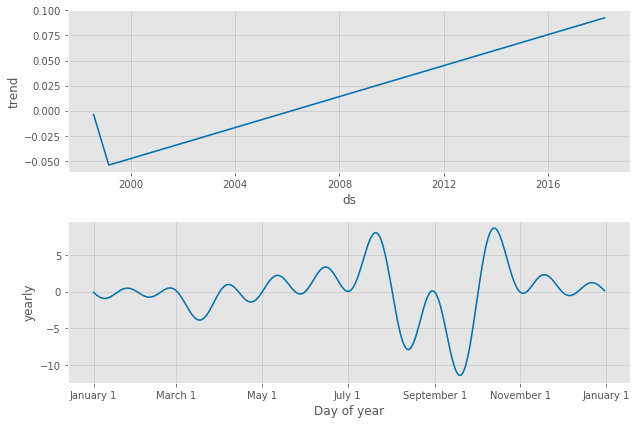

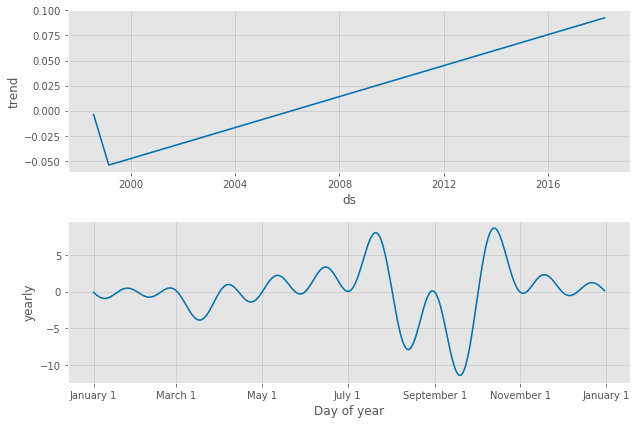

In [110]:
model.plot_components(forecast_data)

In [87]:
forecast_data.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
0,1998-08-01,-0.090715,-0.090715,-0.090715,-2.125505,3.988269,1.104055,1.104055,1.104055,0.0,0.0,0.0,1.104055,1.104055,1.104055,1.013340
1,1998-09-01,-0.090289,-0.090289,-0.090289,-2.983974,3.151643,-0.000972,-0.000972,-0.000972,0.0,0.0,0.0,-0.000972,-0.000972,-0.000972,-0.091261
2,1998-10-01,-0.089878,-0.089878,-0.089878,-4.781694,1.105633,-1.643312,-1.643312,-1.643312,0.0,0.0,0.0,-1.643312,-1.643312,-1.643312,-1.733190
3,1998-11-01,-0.089452,-0.089452,-0.089452,-3.157967,2.820497,-0.032904,-0.032904,-0.032904,0.0,0.0,0.0,-0.032904,-0.032904,-0.032904,-0.122356
4,1998-12-01,-0.089041,-0.089041,-0.089041,-3.363497,2.659254,-0.001691,-0.001691,-0.001691,0.0,0.0,0.0,-0.001691,-0.001691,-0.001691,-0.090732


In [111]:
metric_df = forecast_data.set_index('ds')[['yhat']].join(df_apc.set_index('ds').y).reset_index()

In [90]:
metric_df.head()

,ds,yhat,y
0,1998-08-01,1.013340,19.433134
1,1998-09-01,-0.091261,-1.105586
2,1998-10-01,-1.733190,-28.609057
3,1998-11-01,-0.122356,0.194108
4,1998-12-01,-0.090732,-0.739477


In [114]:
metric_df.dropna(inplace=True)

In [115]:
metric_df.tail()

,ds,yhat,y
228,2017-08-01,0.867354,-0.048818
229,2017-09-01,0.040954,0.116895
230,2017-10-01,-1.167504,-0.102582
231,2017-11-01,0.007997,-0.088854
232,2017-12-01,0.034828,-0.001149


In [112]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [116]:
r2_score(metric_df.y, metric_df.yhat)

0.056098865170922

In [119]:
mean_squared_error(metric_df.y, metric_df.yhat)

4.914783850981346

In [120]:
mean_absolute_error(metric_df.y, metric_df.yhat)

0.5034771784533952